# Khipus.ai
## Applied Statistics with Python
### Advanced Statistical Methods with Python: Non-linear Models: Logistic Regression
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span> 

Source: [Udemy, n.d.] Udemy. The Data Science Course 2023: Complete Data Science Bootcamp [Online Course]. Lecture 10777126

# Building a Logistic Regression

## Import the relevant libraries

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [3]:
raw_data = pd.read_csv('Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [5]:
# Check the descriptive statistics
data.describe()

,SAT,Admitted
count,168.000000,168.000000
mean,1695.273810,0.559524
std,183.019017,0.497928
min,1334.000000,0.000000
25%,1547.500000,0.000000
50%,1691.500000,1.000000
75%,1844.500000,1.000000
max,2050.000000,1.000000


### Declare the dependent and independent variables

In [6]:
y = data['Admitted']# dependent variable
x1 = data['SAT']# independent variable

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Feb 2025   Pseudo R-squ.:                  0.7992
Time:                        10:26:03   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Note: The intercept (const) in the logistic regression results is -69.9128.

### Regression summary analysis:
Model Fit: The logistic regression model fits the data well.

Key Findings:

Intercept: The starting point (when SAT is zero) is significantly negative.

SAT Score: Higher SAT scores increase the chances of being admitted.

Statistical Significance: Both the intercept and SAT score effects are highly significant, meaning the results are reliable.

Coefficients:

Intercept (const): -69.9128 (p-value < 0.001), indicating a significant negative intercept.

SAT: 0.0420 (p-value < 0.001), indicating a significant positive relationship between SAT scores and the probability of being admitted.

Conclusion:
Higher SAT scores significantly improve the likelihood of admission. The model is a good predictor of admission based on SAT scores.


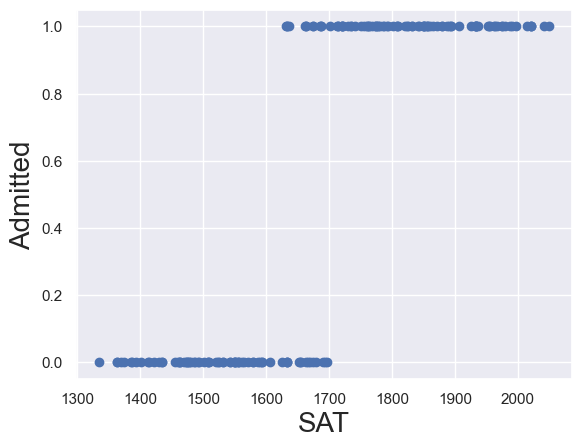

In [8]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')

# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot a logistic regression curve

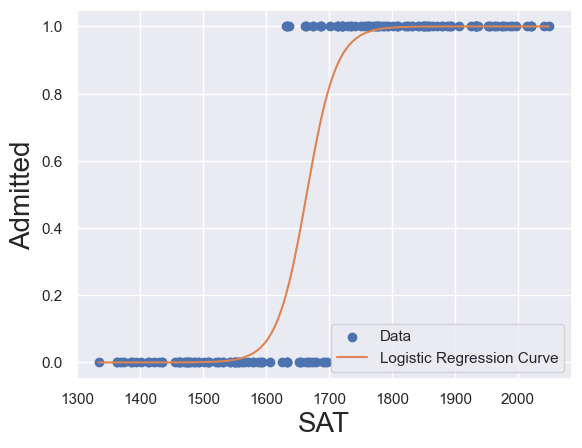

In [9]:
# Generate values for SAT to plot the logistic regression curve
x_values = pd.DataFrame({'SAT': range(data['SAT'].min(), data['SAT'].max())})
x_values = sm.add_constant(x_values)

# Predict the probability of admission for each SAT score
y_values = results_log.predict(x_values)

# Plot the logistic regression curve
plt.scatter(x1, y, color='C0', label='Data')
plt.plot(x_values['SAT'], y_values, color='C1', label='Logistic Regression Curve')

# Label the axes
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.legend()
plt.show()

### Making predictions

If a student have a SAT of 1400 what is the probability of a student being admitted?

In [14]:
# Define the SAT score for prediction
sat_score = 1600

# Create a new data frame with the SAT score and a constant term
new_data = pd.DataFrame({'const': 1, 'SAT': [sat_score]})

# Predict the probability of admission
predicted_prob = results_log.predict(new_data)
print(f'The probability of a student with a SAT score of {sat_score} being admitted is {predicted_prob[0]:.4f}')

The probability of a student with a SAT score of 1600 being admitted is 0.0627
